## Credit card debt prediction

### Description
Credit card debt prediction is important for managing risk, aiding financial planning, retaining customers, complying with regulations, and making informed investment decisions.

With several explanatory variables describing (almost) every aspect of social, economic, and cultural features of different individuals (masked as Index), this competition challenges you to predict their credit card balance (Balance, Y).

### Evaluation
#### Goal
our job is to predict the credit card balance for each individual for the test dataset (50 individuals). For each index in the test set, we must predict the value of the "Balance" variable.

Metric:

Submissions are evaluated on R-squared (Coefficient of Determination) between the predicted value and the observed credit card balance.

### Dataset Description
#### Files
Train_Features.csv - features of the training set

Test_Features.csv - features of the test set

Train_Output.csv - output of the training set

Sample_Submission.csv - a sample submission file in the correct format

#### Columns
'Index' - Unique identifier of individuals

Income - Income of the individual in $1,000's

'Limit' - Credit card limit of the individual

'Rating' - Credit rating

'Cards' - Number of credit cards

'Age' - Age in years

'Education' - Number of years of education

'Own' - A factor with levels of Yes and No

'Student' - A factor with levels No and Yes indicating whether the individual was a student

'Married' - A factor with levels No and Yes indicating whether the individual was married

'Region' - A factor with different levels of the individual's location

'Balance' - The response variable indicating credit card balance


In [543]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#### Data import

In [544]:
Train_Features = pd.read_csv('../Data/Train_Features.csv')
Train_Output = pd.read_csv('../Data/Train_Output.csv')
Test_Features = pd.read_csv('../Data/Test_Features.csv')

#### EDA

In [545]:
Train_Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      350 non-null    int64  
 1   Income     350 non-null    float64
 2   Limit      350 non-null    int64  
 3   Rating     350 non-null    int64  
 4   Cards      350 non-null    int64  
 5   Age        350 non-null    int64  
 6   Education  350 non-null    int64  
 7   Own        350 non-null    object 
 8   Student    350 non-null    object 
 9   Married    350 non-null    object 
 10  Region     350 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 30.2+ KB


In [546]:
Train_Output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Index    350 non-null    int64
 1   Balance  350 non-null    int64
dtypes: int64(2)
memory usage: 5.6 KB


In [547]:
df = pd.merge(Train_Features, Train_Output, on='Index')

In [548]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
Index,1,2,3,4,5,6,7,8,9,10,...,341,342,343,344,345,346,347,348,349,350
Income,28.316,43.682,30.406,24.46,91.362,20.791,69.165,58.165,37.728,55.412,...,80.18,69.251,76.273,19.144,27.039,104.593,77.38,180.682,27.33,21.374
Limit,4391,6922,2120,1924,9113,2672,4668,6617,2525,5354,...,8047,6386,4779,3291,2161,7075,7569,11966,6179,2073
Rating,316,511,181,165,626,204,341,460,192,383,...,569,474,367,269,173,514,564,832,459,175
Cards,2,1,2,2,1,1,2,1,1,2,...,4,4,4,2,3,4,3,2,4,2
Age,29,49,79,50,47,70,34,56,44,37,...,77,30,65,75,40,71,50,58,36,74
Education,10,9,14,14,17,18,11,12,13,16,...,10,12,14,13,17,11,12,8,12,11
Own,Yes,No,No,Yes,No,Yes,Yes,Yes,No,Yes,...,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes
Student,No,No,No,No,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,No,No,No
Married,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,...,No,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes


In [549]:
df.describe()

,Index,Income,Limit,Rating,Cards,Age,Education,Balance
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,175.500000,46.056531,4775.597143,357.422857,2.971429,55.705714,13.511429,527.774286
std,101.180532,36.065012,2330.288627,156.057070,1.389393,17.332307,3.124657,460.606506
min,1.000000,10.363000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,88.250000,21.394250,3180.500000,251.000000,2.000000,42.000000,11.000000,90.500000
50%,175.500000,33.325500,4654.000000,344.000000,3.000000,56.000000,14.000000,466.000000
75%,262.750000,58.304500,5880.250000,436.500000,4.000000,69.750000,16.000000,861.250000
max,350.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [550]:
numerical_df = df.select_dtypes(exclude='object')
numerical_df.columns

Index(['Index', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Balance'],
      dtype='object')

In [551]:
numerical_df.corr().style.background_gradient()

,Index,Income,Limit,Rating,Cards,Age,Education,Balance
Index,1.000000,0.009450,0.021745,0.027226,0.074803,0.153882,0.057881,0.047302
Income,0.009450,1.000000,0.798768,0.799344,-0.031398,0.201997,-0.026987,0.470653
Limit,0.021745,0.798768,1.000000,0.996931,-0.015707,0.113228,-0.050566,0.858874
Rating,0.027226,0.799344,0.996931,1.000000,0.027464,0.116717,-0.054946,0.859501
Cards,0.074803,-0.031398,-0.015707,0.027464,1.000000,0.061165,-0.052065,0.053892
Age,0.153882,0.201997,0.113228,0.116717,0.061165,1.000000,-0.025307,0.006663
Education,0.057881,-0.026987,-0.050566,-0.054946,-0.052065,-0.025307,1.000000,-0.035028
Balance,0.047302,0.470653,0.858874,0.859501,0.053892,0.006663,-0.035028,1.000000


In [552]:
print("Unique values in 'Married' column:", df['Married'].unique())
print("Unique values in 'Own' column:", df['Own'].unique())
print("Unique values in 'Student' column:", df['Student'].unique())
print("Unique values in 'Region' column:", df['Region'].unique())

Unique values in 'Married' column: ['No' 'Yes']
Unique values in 'Own' column: ['Yes' 'No']
Unique values in 'Student' column: ['No' 'Yes']
Unique values in 'Region' column: ['South' 'East' 'West']


In [553]:
# Conveting them to category from object
df['Own'] = df['Own'].astype('category')
df['Student'] = df['Student'].astype('category')
df['Married'] = df['Married'].astype('category')
df['Region'] = df['Region'].astype('category')

In [554]:
categorical_df = df.select_dtypes(include='category')
categorical_df.T

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
Own,Yes,No,No,Yes,No,Yes,Yes,Yes,No,Yes,...,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes
Student,No,No,No,No,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,No,No,No
Married,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,...,No,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes
Region,South,South,East,West,West,East,East,South,South,South,...,South,West,South,East,South,West,South,East,South,South


In [555]:
def plot_distribution(df, column_name):
    plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
    # Plot histogram
    sns.histplot(data=df, x=column_name, bins=30, kde=True,
                 color='skyblue', edgecolor='black')
    # Add mean, mode, and median lines
    plt.axvline(df[column_name].mean(), color='red',
                linestyle='--', label='Mean')
    plt.axvline(df[column_name].mode().values[0],
                color='green', linestyle='--', label='Mode')
    plt.axvline(df[column_name].median(), color='orange',
                linestyle='--', label='Median')
    # Add legend
    plt.legend()
    # Title
    plt.title('Distribution of ' + column_name, fontsize=16, fontweight='bold')
    # Labels
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    # Gridlines
    plt.grid(True, linestyle='--', alpha=0.6)
    # Tick label size adjustment
    plt.tick_params(axis='both', which='major', labelsize=10)
    # Remove top and right spines
    sns.despine()
    # Show plot
    plt.show()
    # Print statistics
    mean_val = df[column_name].mean()
    mode_val = df[column_name].mode().values[0]
    skew_val = df[column_name].skew()
    kurtosis_val = df[column_name].kurtosis()
    print("Mean:", mean_val)
    print("Mode:", mode_val)
    print("Skewness:", skew_val)
    print("Kurtosis:", kurtosis_val)

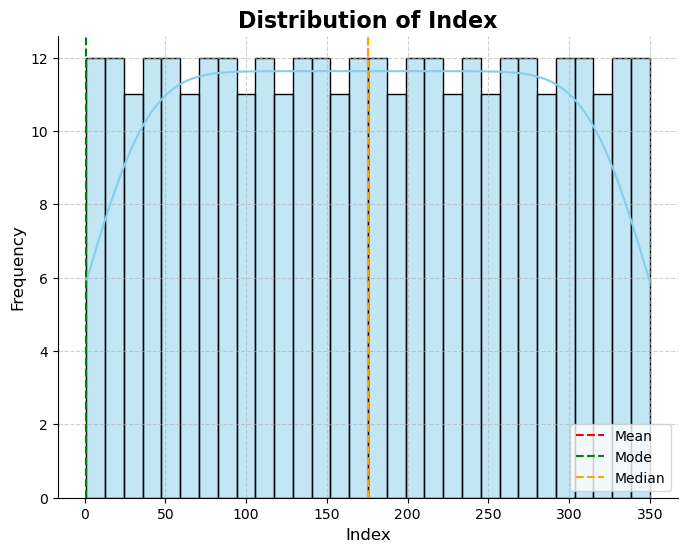

Mean: 175.5
Mode: 1
Skewness: 0.0
Kurtosis: -1.1999999999999997


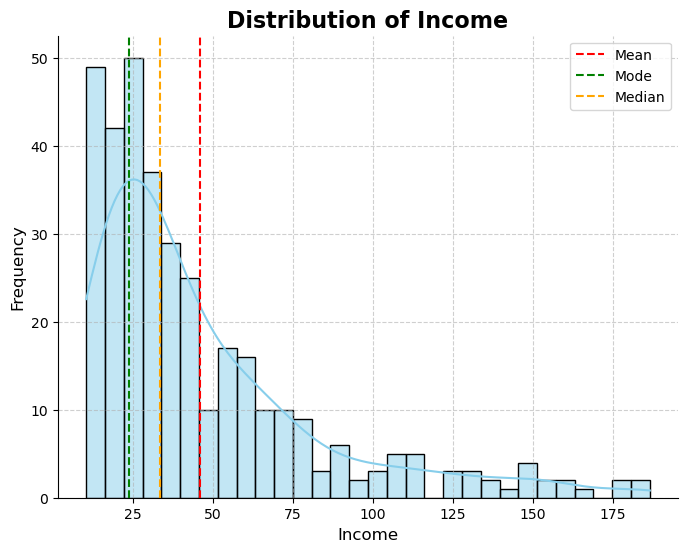

Mean: 46.05653142857143
Mode: 23.793
Skewness: 1.738617484144414
Kurtosis: 2.851538192811772


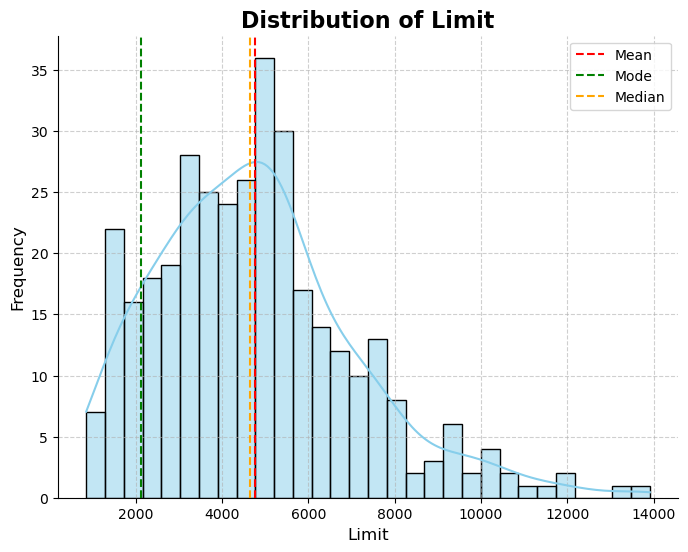

Mean: 4775.597142857143
Mode: 2120
Skewness: 0.8609228794607883
Kurtosis: 1.0751145824277866


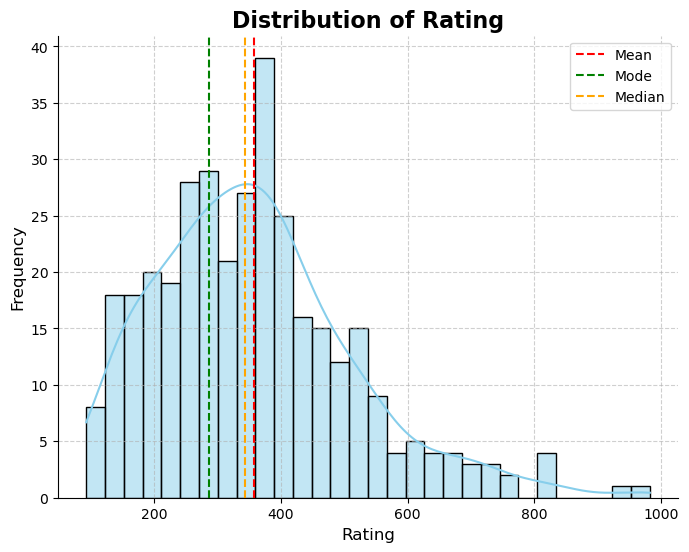

Mean: 357.42285714285714
Mode: 287
Skewness: 0.8927384346973
Kurtosis: 1.1573192982504357


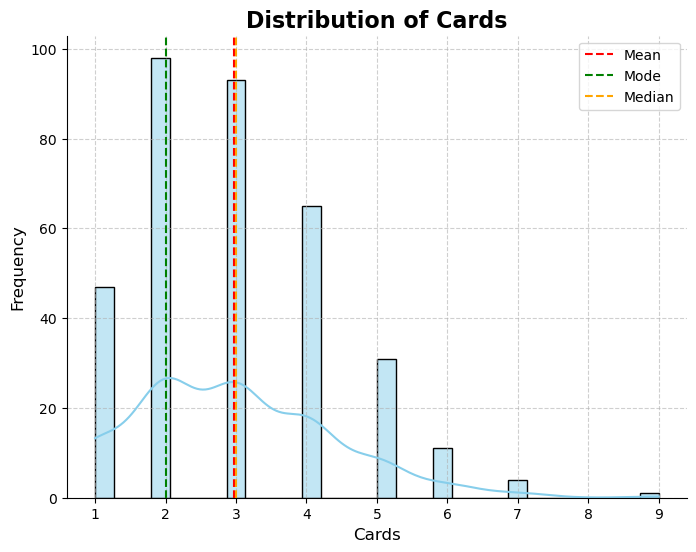

Mean: 2.9714285714285715
Mode: 2
Skewness: 0.7153233184722622
Kurtosis: 0.6464909885390022


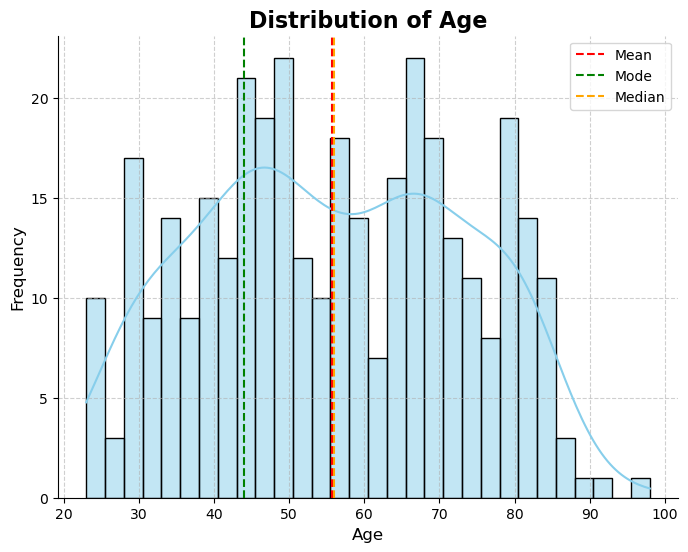

Mean: 55.705714285714286
Mode: 44
Skewness: 0.026527296415992784
Kurtosis: -1.0363795879385096


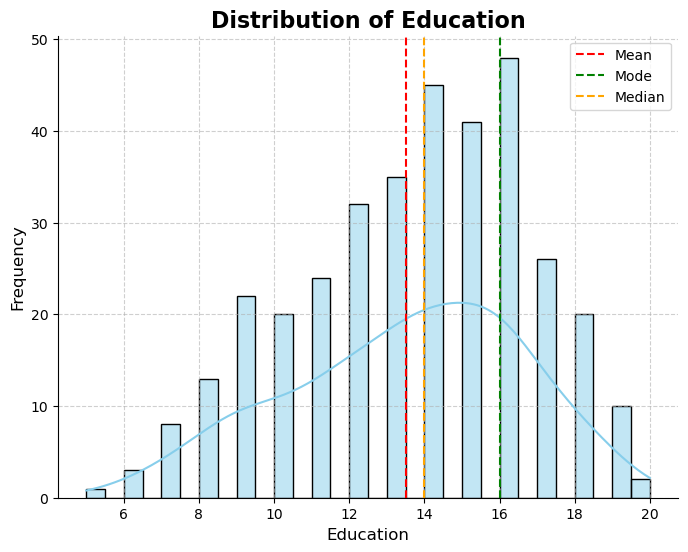

Mean: 13.51142857142857
Mode: 16
Skewness: -0.34590301047356903
Kurtosis: -0.5463656154109433


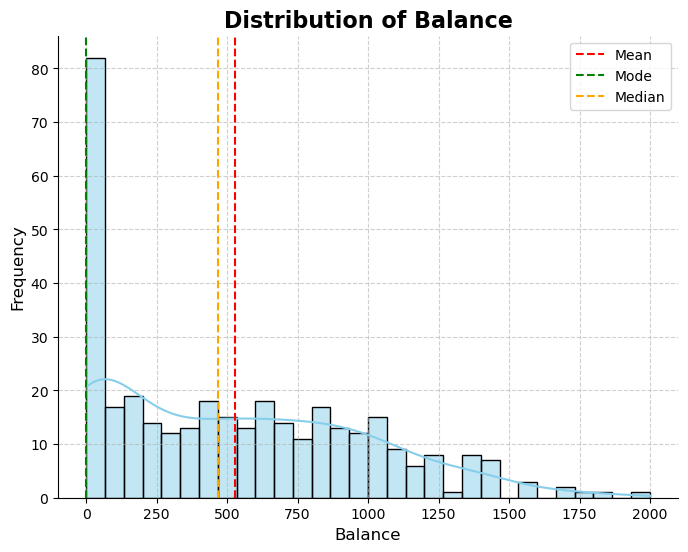

Mean: 527.7742857142857
Mode: 0
Skewness: 0.5827685958455089
Kurtosis: -0.5004602206730451


In [556]:
for col in numerical_df:
    plot_distribution(numerical_df, col)

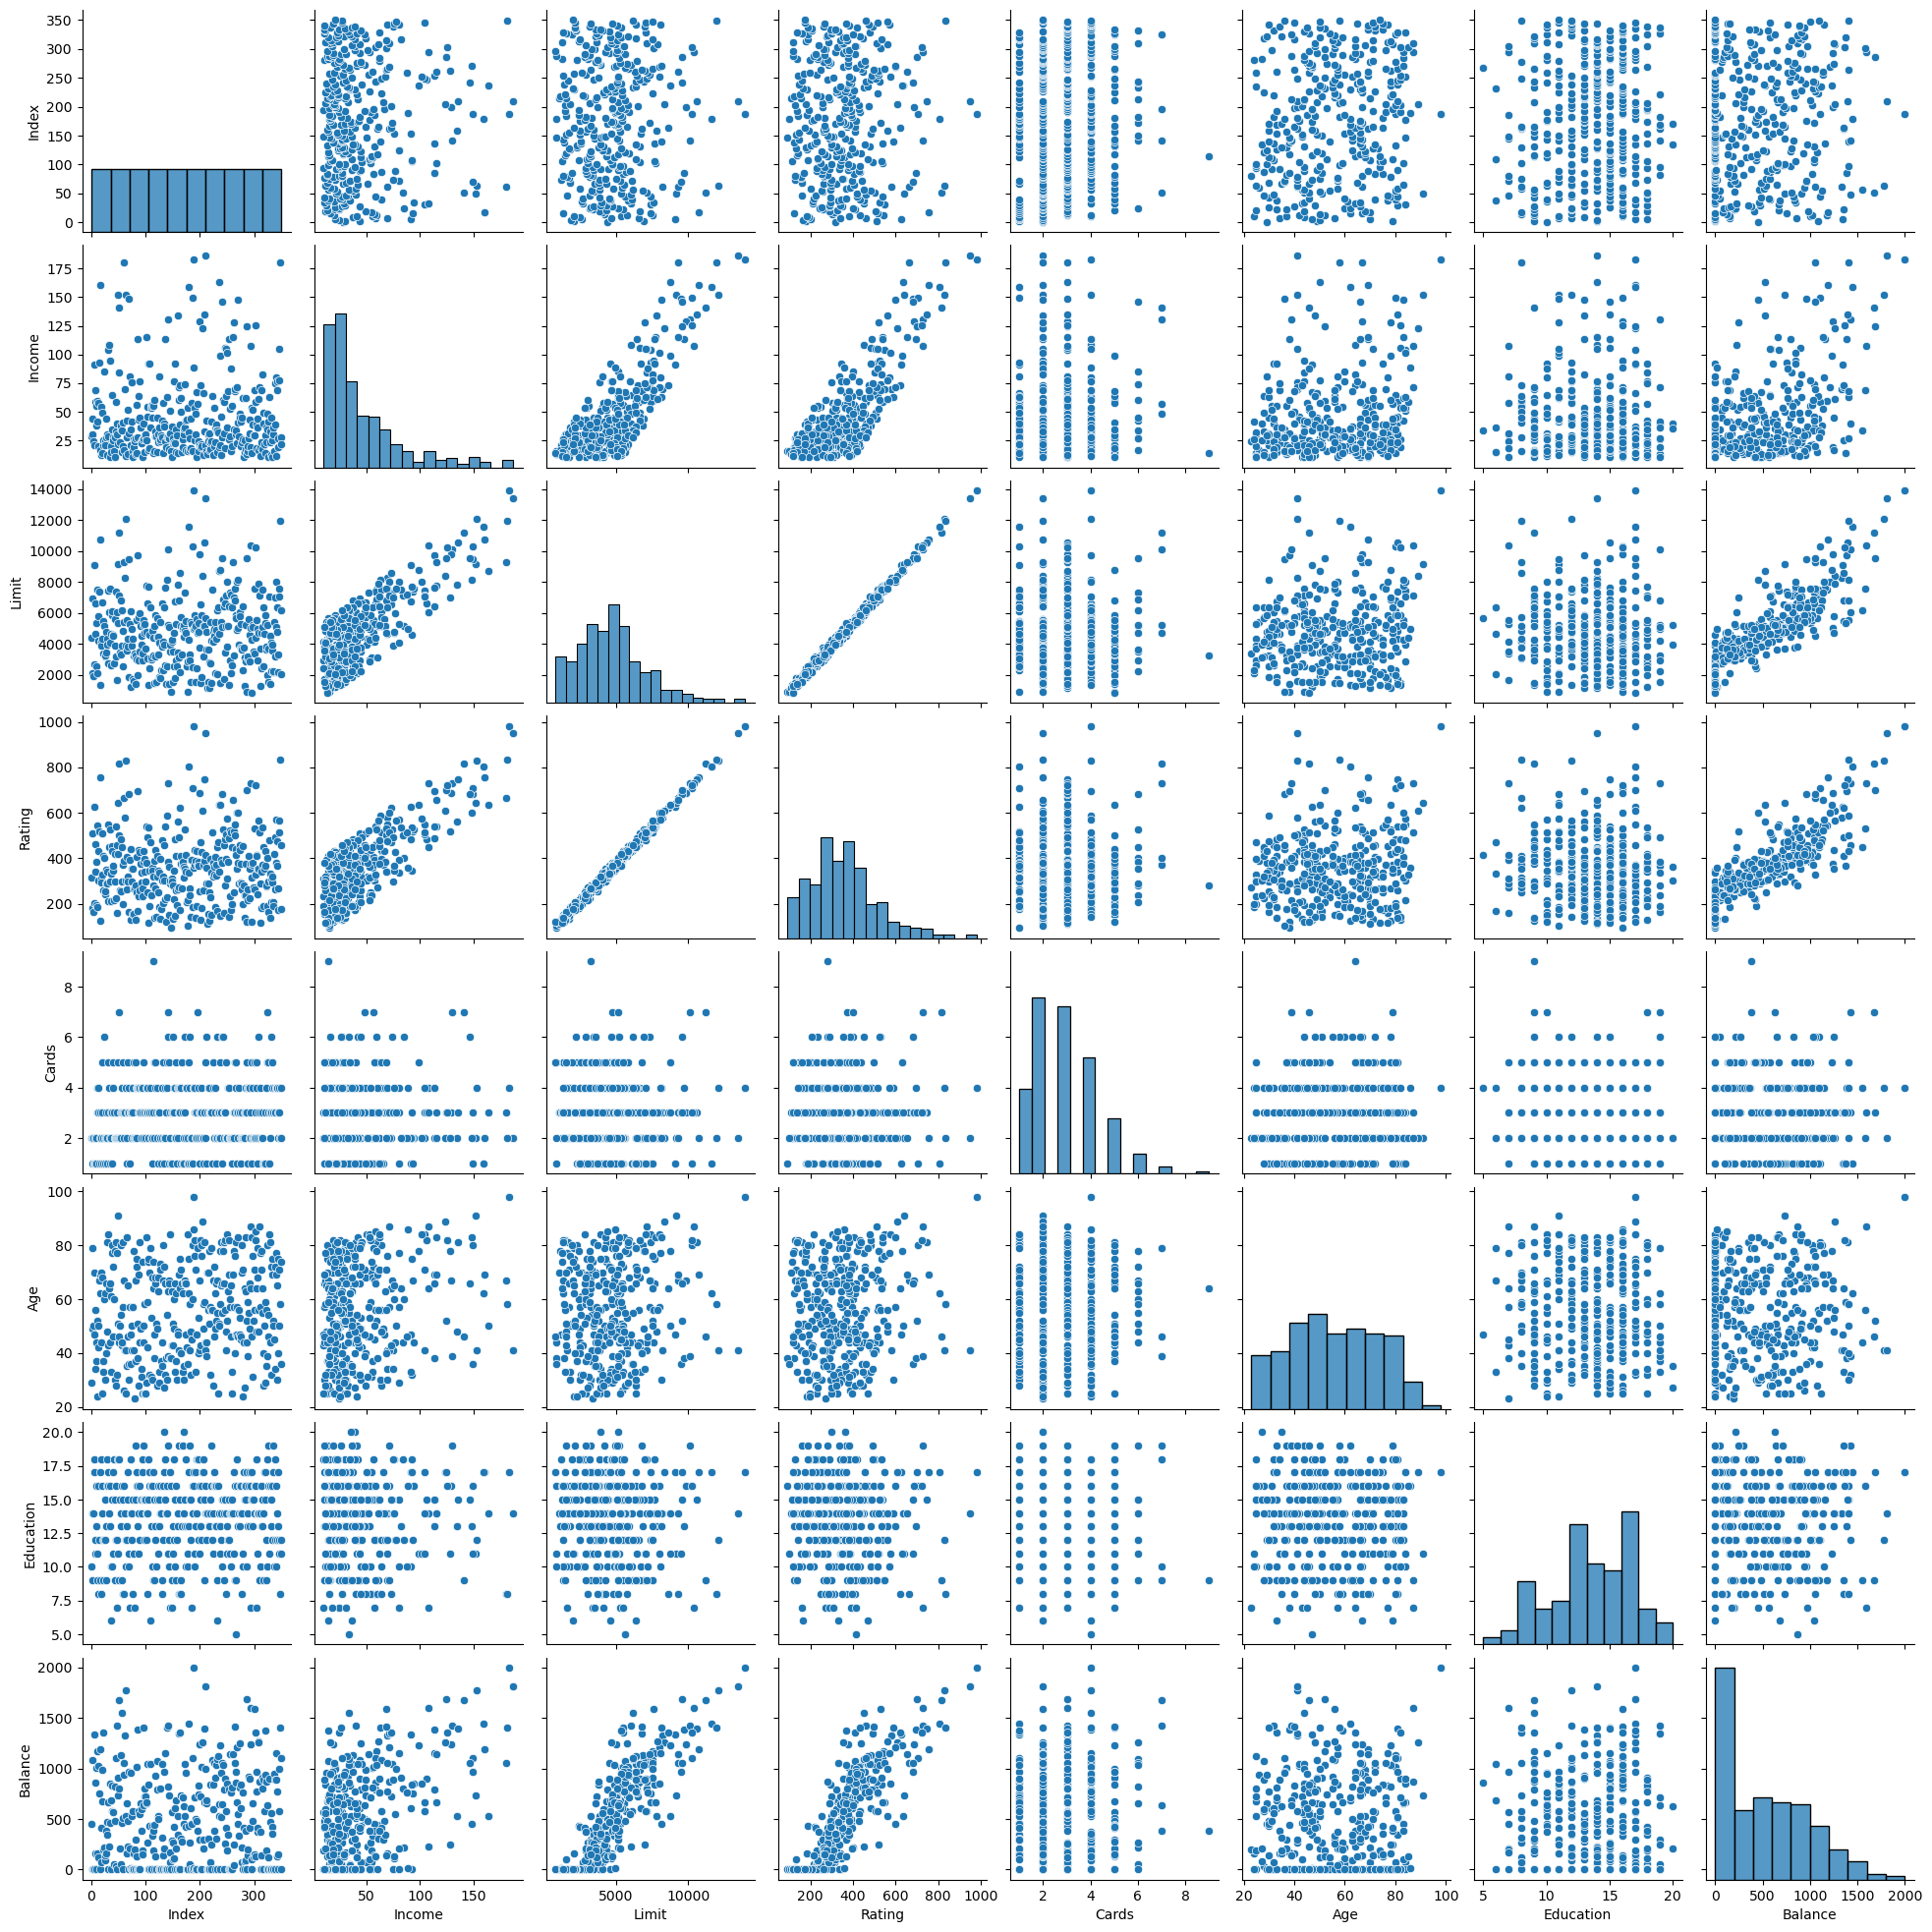

In [557]:
sns.pairplot(df)
plt.show()

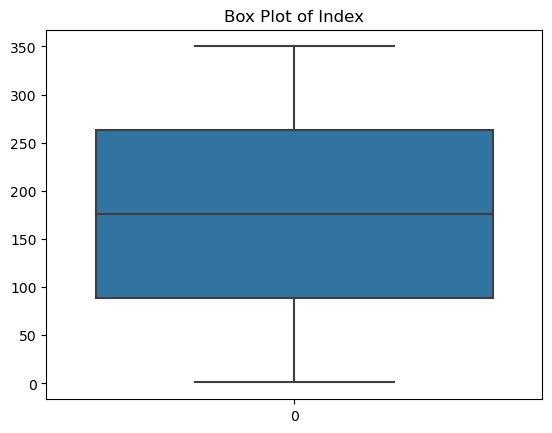

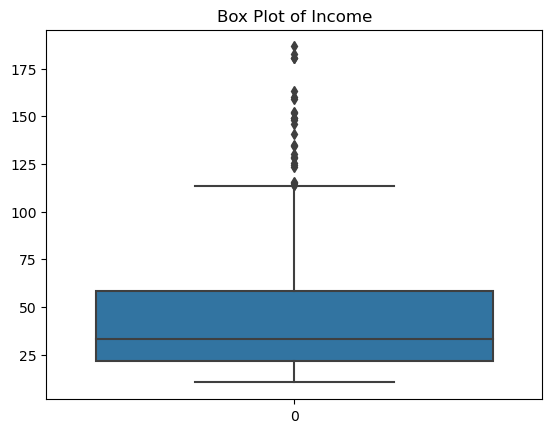

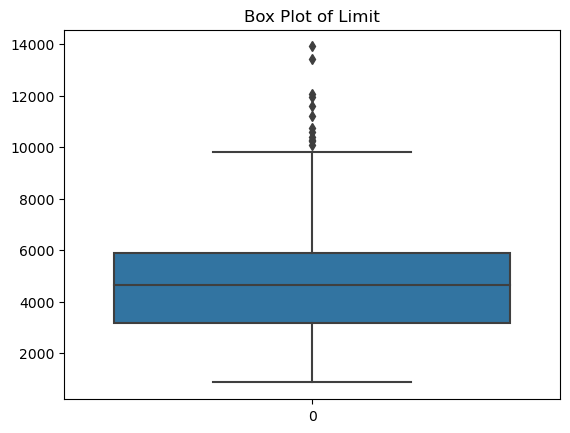

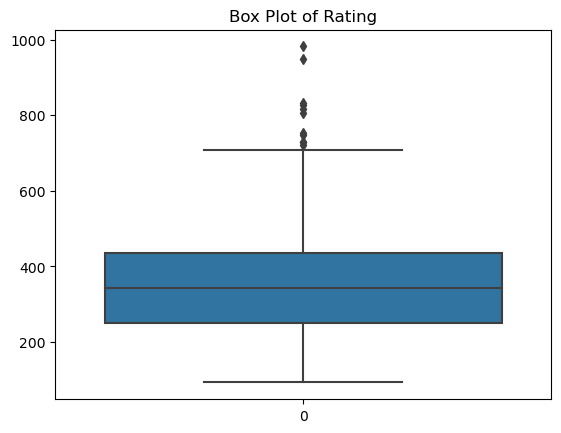

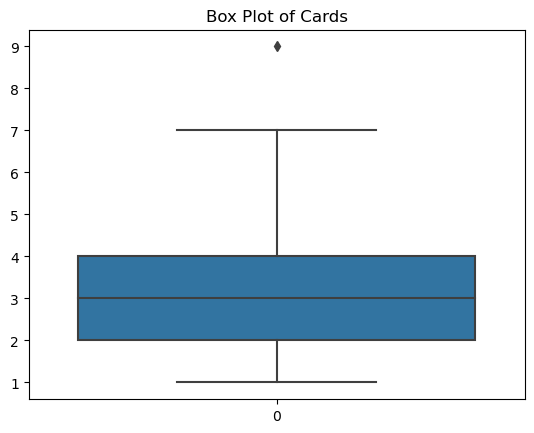

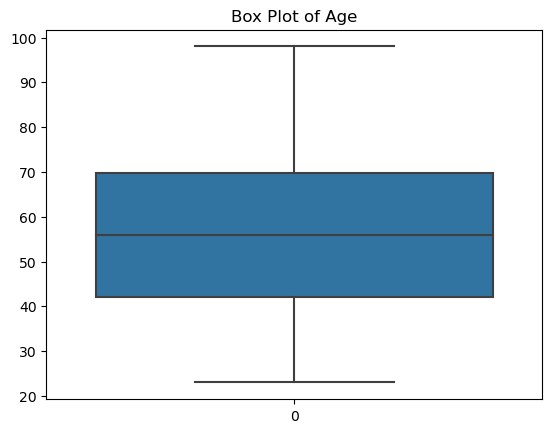

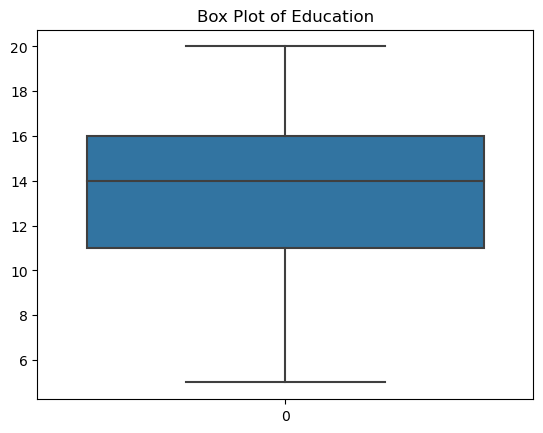

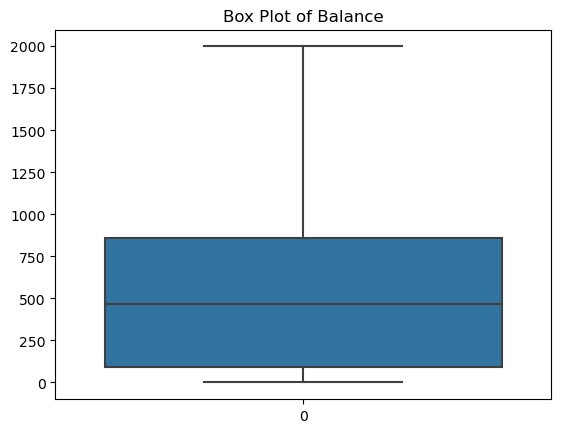

In [558]:
for col in numerical_df:
    sns.boxplot(data=numerical_df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [559]:
df[df['Income'] > 120].sort_values(by='Income')

,Index,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
204,205,123.299,8376,610,2,89,17,No,Yes,No,East,1259
285,286,124.290,9560,701,3,52,17,Yes,Yes,No,West,1687
301,302,125.480,10230,721,3,82,16,No,No,Yes,South,1361
261,262,128.040,6982,518,2,78,11,Yes,No,Yes,South,250
199,200,128.669,9824,685,3,67,16,No,No,Yes,West,1243
141,142,130.209,10088,730,7,39,19,Yes,No,Yes,South,1426
158,159,134.181,7838,563,2,48,13,Yes,No,No,South,526
208,209,135.118,10578,747,3,81,15,Yes,No,Yes,West,1393
51,52,140.672,11200,817,7,46,9,No,No,Yes,East,1677
240,241,146.183,9540,682,6,66,15,No,No,No,South,1050


In [560]:
def plot_sum_of_numarical_col_by_catagoricl_col(col):
    sum__by_credit_score = df.groupby('Region')[col].count().reset_index()
    plt.figure(figsize=(5, 3))
    sns.barplot(x='Region', y=col, data=sum__by_credit_score,
                palette='viridis', width=.5)
    plt.title(f'Sum {col} by Region')
    plt.xlabel('Region')
    plt.ylabel(f'Sum {col}')
    plt.show()

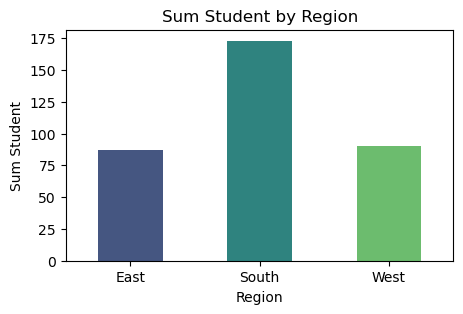

In [561]:
plot_sum_of_numarical_col_by_catagoricl_col('Student')

In [562]:
sub_df = pd.get_dummies(df, dtype=float)

In [563]:
sub_df

,Index,Income,Limit,Rating,Cards,Age,Education,Balance,Own_No,Own_Yes,Student_No,Student_Yes,Married_No,Married_Yes,Region_East,Region_South,Region_West
0,1,28.316,4391,316,2,29,10,453,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,43.682,6922,511,1,49,9,1081,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3,30.406,2120,181,2,79,14,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,24.460,1924,165,2,50,14,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5,91.362,9113,626,1,47,17,1341,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,346,104.593,7075,514,4,71,11,580,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
346,347,77.380,7569,564,3,50,12,997,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
347,348,180.682,11966,832,2,58,8,1405,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
348,349,27.330,6179,459,4,36,12,1099,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [564]:
sub_df.corr().style.background_gradient()

,Index,Income,Limit,Rating,Cards,Age,Education,Balance,Own_No,Own_Yes,Student_No,Student_Yes,Married_No,Married_Yes,Region_East,Region_South,Region_West
Index,1.000000,0.009450,0.021745,0.027226,0.074803,0.153882,0.057881,0.047302,0.029863,-0.029863,-0.020361,0.020361,0.026049,-0.026049,-0.079074,0.062528,0.006664
Income,0.009450,1.000000,0.798768,0.799344,-0.031398,0.201997,-0.026987,0.470653,0.000651,-0.000651,-0.030618,0.030618,-0.060702,0.060702,0.038977,-0.040449,0.007729
Limit,0.021745,0.798768,1.000000,0.996931,-0.015707,0.113228,-0.050566,0.858874,-0.016824,0.016824,-0.000984,0.000984,-0.052835,0.052835,0.047096,-0.039663,-0.001199
Rating,0.027226,0.799344,0.996931,1.000000,0.027464,0.116717,-0.054946,0.859501,-0.018136,0.018136,-0.004180,0.004180,-0.059300,0.059300,0.048710,-0.040161,-0.002226
Cards,0.074803,-0.031398,-0.015707,0.027464,1.000000,0.061165,-0.052065,0.053892,0.008120,-0.008120,0.039150,-0.039150,-0.034282,0.034282,0.016609,-0.037306,0.026252
Age,0.153882,0.201997,0.113228,0.116717,0.061165,1.000000,-0.025307,0.006663,0.006671,-0.006671,0.031741,-0.031741,0.079936,-0.079936,0.051414,-0.000690,-0.050052
Education,0.057881,-0.026987,-0.050566,-0.054946,-0.052065,-0.025307,1.000000,-0.035028,0.001852,-0.001852,-0.092911,0.092911,-0.044250,0.044250,-0.003166,-0.046662,0.056509
Balance,0.047302,0.470653,0.858874,0.859501,0.053892,0.006663,-0.035028,1.000000,-0.032523,0.032523,-0.271688,0.271688,-0.006223,0.006223,0.030265,-0.038093,0.013649
Own_No,0.029863,0.000651,-0.016824,-0.018136,0.008120,0.006671,0.001852,-0.032523,1.000000,-1.000000,0.053111,-0.053111,-0.007168,0.007168,-0.016546,0.022794,-0.009713
Own_Yes,-0.029863,-0.000651,0.016824,0.018136,-0.008120,-0.006671,-0.001852,0.032523,-1.000000,1.000000,-0.053111,0.053111,0.007168,-0.007168,0.016546,-0.022794,0.009713


In [565]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         350 non-null    int64  
 1   Income        350 non-null    float64
 2   Limit         350 non-null    int64  
 3   Rating        350 non-null    int64  
 4   Cards         350 non-null    int64  
 5   Age           350 non-null    int64  
 6   Education     350 non-null    int64  
 7   Balance       350 non-null    int64  
 8   Own_No        350 non-null    float64
 9   Own_Yes       350 non-null    float64
 10  Student_No    350 non-null    float64
 11  Student_Yes   350 non-null    float64
 12  Married_No    350 non-null    float64
 13  Married_Yes   350 non-null    float64
 14  Region_East   350 non-null    float64
 15  Region_South  350 non-null    float64
 16  Region_West   350 non-null    float64
dtypes: float64(10), int64(7)
memory usage: 46.6 KB


#### Model Traning

* for model traing we will try out mutiple supervised regression


In [566]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

In [567]:
def evaluate_regression_model(y_true, y_pred):
    """
    Evaluate the performance of a regression model using various metrics.

    Args:
    - y_true: Array-like, true target values.
    - y_pred: Array-like, predicted target values.

    Returns:
    - metrics_dict: Dictionary containing evaluation metrics.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - 16 - 1))
    mae = mean_absolute_error(y_true, y_pred)

    metrics_dict = {
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Error (MAE)": mae,
        "R-squared (R2)": r2,
        "Adjusted R-squared (R2_adj)": adjusted_r2,
    }
    return metrics_dict

In [568]:
X = sub_df.drop(columns='Balance')
y = sub_df['Balance']

In [569]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [570]:
normalizer = MinMaxScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

LinearRegression_model

In [571]:
LinearRegression_model = LinearRegression()
# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [1, 2, 3, 4]
    # Add more hyperparameters here if needed
}
# Create GridSearchCV
LinearRegression_grid_search = GridSearchCV(LinearRegression_model,
                                            param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
LinearRegression_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = LinearRegression_grid_search.best_params_
best_score = LinearRegression_grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Negative MSE):", best_score)

Best Parameters: {'fit_intercept': True, 'n_jobs': 1}
Best Score (Negative MSE): -10517.20267857143


In [572]:
LinearRegression_model = LinearRegression_grid_search.best_estimator_
LinearRegression_model.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [573]:
y_test_pred_lRM = LinearRegression_model.predict(X_test)
LRM_report = evaluate_regression_model(y_test, y_test_pred_lRM)
LRM_report

{'Mean Squared Error (MSE)': 10134.79606841479,
 'Root Mean Squared Error (RMSE)': 100.67172427456872,
 'Mean Absolute Error (MAE)': 77.18880512619087,
 'R-squared (R2)': 0.9489179741418927,
 'Adjusted R-squared (R2_adj)': 0.9334969852035961}

Ridge

In [574]:
ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid_search = GridSearchCV(
    estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid_search.fit(X_train, y_train)
best_params = ridge_grid_search.best_params_
print("Best hyperparameters:", best_params)
print("Best Score (Negative MSE):", best_score)

Best hyperparameters: {'alpha': 0.01}
Best Score (Negative MSE): -10517.20267857143


In [575]:
ridge = ridge_grid_search.best_estimator_
ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

In [576]:
y_test_pred_ridge = ridge.predict(X_test)
ridge_report = evaluate_regression_model(y_test, y_test_pred_ridge)
ridge_report

{'Mean Squared Error (MSE)': 10084.09448971339,
 'Root Mean Squared Error (RMSE)': 100.41959216066051,
 'Mean Absolute Error (MAE)': 77.5219589157783,
 'R-squared (R2)': 0.9491735233741406,
 'Adjusted R-squared (R2_adj)': 0.9338296813738812}

Lasso

In [577]:
lasso = Lasso()

# Define hyperparameters to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV
Lasso_grid_search = GridSearchCV(
    estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
Lasso_grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = Lasso_grid_search.best_params_
print("Best hyperparameters:", best_params)
print("Best Score (Negative MSE):", best_score)

Best hyperparameters: {'alpha': 0.001}
Best Score (Negative MSE): -10517.20267857143


In [578]:
lasso = Lasso_grid_search.best_estimator_
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [579]:
y_test_pred_lasso = lasso.predict(X_test)
lasso_report = evaluate_regression_model(y_test, y_test_pred_lasso)
lasso_report

{'Mean Squared Error (MSE)': 10136.777601092661,
 'Root Mean Squared Error (RMSE)': 100.68156534883961,
 'Mean Absolute Error (MAE)': 77.18093828233147,
 'R-squared (R2)': 0.9489079866983561,
 'Adjusted R-squared (R2_adj)': 0.9334839826827654}

In [580]:
elastic_net = ElasticNet()
elastic_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                      'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
elastic_grid_search = GridSearchCV(
    estimator=elastic_net, param_grid=elastic_param_grid, scoring='neg_mean_squared_error', cv=5)
elastic_grid_search.fit(X_train, y_train)
elastic_best_model = elastic_grid_search.best_estimator_
best_params = elastic_grid_search.best_params_
print("Best hyperparameters:", best_params)
print("Best Score (Negative MSE):", best_score)

Best hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.9}
Best Score (Negative MSE): -10517.20267857143


In [581]:
elastic_net = elastic_grid_search.best_estimator_
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.9)

In [582]:
y_test_pred_elastic_net = elastic_net.predict(X_test)
elastic_net_report = evaluate_regression_model(y_test, y_test_pred_elastic_net)
elastic_net_report

{'Mean Squared Error (MSE)': 10069.481835819295,
 'Root Mean Squared Error (RMSE)': 100.34680780084285,
 'Mean Absolute Error (MAE)': 77.8462243768791,
 'R-squared (R2)': 0.9492471749759128,
 'Adjusted R-squared (R2_adj)': 0.9339255674214714}

SVR

In [583]:
svr = SVR()

# Define hyperparameters to search
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.01, 0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 0.5, 1, 2]}

# Perform GridSearchCV
SVG_grid_search = GridSearchCV(
    estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
SVG_grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = SVG_grid_search.best_params_
print("Best hyperparameters:", best_params)
print("Best Score (Negative MSE):", best_score)

Best hyperparameters: {'C': 1000, 'epsilon': 0.01, 'gamma': 0.1}
Best Score (Negative MSE): -10517.20267857143


In [584]:
# Evaluate model with best hyperparameters
svr = SVG_grid_search.best_estimator_
svr.fit(X_train, y_train)

SVR(C=1000, epsilon=0.01, gamma=0.1)

In [585]:
y_test_pred_svr = svr.predict(X_test)
svr_report = evaluate_regression_model(y_test, y_test_pred_svr)
svr_report

{'Mean Squared Error (MSE)': 24083.710687354032,
 'Root Mean Squared Error (RMSE)': 155.1892737509717,
 'Mean Absolute Error (MAE)': 120.3396493713807,
 'R-squared (R2)': 0.8786117921085098,
 'Adjusted R-squared (R2_adj)': 0.8419662953865505}

RandomForestRegressor

In [586]:
%%time
rf_regressor = RandomForestRegressor()

# Define hyperparameters to search
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Perform GridSearchCV
RandomForestRegressor_grid_search = GridSearchCV(
    estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
RandomForestRegressor_grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = RandomForestRegressor_grid_search.best_params_
print("Best hyperparameters:", best_params)
print("Best Score (Negative MSE):", best_score)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score (Negative MSE): -10517.20267857143
CPU times: user 1min 18s, sys: 299 ms, total: 1min 18s
Wall time: 1min 19s


In [587]:
# Evaluate model with best hyperparameters
rf_regressor = RandomForestRegressor_grid_search.best_estimator_
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=300)

In [588]:
y_test_pred_rf_regressor = rf_regressor.predict(X_test)
rf_regressor_report = evaluate_regression_model(
    y_test, y_test_pred_rf_regressor)
rf_regressor_report

{'Mean Squared Error (MSE)': 8225.335434920633,
 'Root Mean Squared Error (RMSE)': 90.6936350298114,
 'Mean Absolute Error (MAE)': 53.299333333333344,
 'R-squared (R2)': 0.9585421557037861,
 'Adjusted R-squared (R2_adj)': 0.9460265800671932}

GradientBoostingRegressor

In [589]:
gb_regressor = GradientBoostingRegressor()

# Define hyperparameters to search
param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 4, 5]}

# Perform GridSearchCV
GradientBoostingRegressor_grid_search = GridSearchCV(
    estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
GradientBoostingRegressor_grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = GradientBoostingRegressor_grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [590]:
# Evaluate model with best hyperparameters
gb_regressor = GradientBoostingRegressor_grid_search.best_estimator_
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=200)

In [591]:
y_test_pred_gb_regressor = gb_regressor.predict(X_test)
gb_regressor_report = evaluate_regression_model(
    y_test, y_test_pred_gb_regressor)
gb_regressor_report

{'Mean Squared Error (MSE)': 4846.710068683203,
 'Root Mean Squared Error (RMSE)': 69.61831704862739,
 'Mean Absolute Error (MAE)': 50.83912762655389,
 'R-squared (R2)': 0.9755713122016526,
 'Adjusted R-squared (R2_adj)': 0.968196613998378}

In [595]:
print(LRM_report)
print(ridge_report)
print(lasso_report)
print(elastic_net_report)
print(svr_report)
print(rf_regressor_report)
print(gb_regressor_report)

{'Mean Squared Error (MSE)': 10134.79606841479, 'Root Mean Squared Error (RMSE)': 100.67172427456872, 'Mean Absolute Error (MAE)': 77.18880512619087, 'R-squared (R2)': 0.9489179741418927, 'Adjusted R-squared (R2_adj)': 0.9334969852035961}
{'Mean Squared Error (MSE)': 10084.09448971339, 'Root Mean Squared Error (RMSE)': 100.41959216066051, 'Mean Absolute Error (MAE)': 77.5219589157783, 'R-squared (R2)': 0.9491735233741406, 'Adjusted R-squared (R2_adj)': 0.9338296813738812}
{'Mean Squared Error (MSE)': 10136.777601092661, 'Root Mean Squared Error (RMSE)': 100.68156534883961, 'Mean Absolute Error (MAE)': 77.18093828233147, 'R-squared (R2)': 0.9489079866983561, 'Adjusted R-squared (R2_adj)': 0.9334839826827654}
{'Mean Squared Error (MSE)': 10069.481835819295, 'Root Mean Squared Error (RMSE)': 100.34680780084285, 'Mean Absolute Error (MAE)': 77.8462243768791, 'R-squared (R2)': 0.9492471749759128, 'Adjusted R-squared (R2_adj)': 0.9339255674214714}
{'Mean Squared Error (MSE)': 24083.710687354

In [597]:
import pandas as pd

# Define the reports
reports = {
    'LRM_report': {'Mean Squared Error (MSE)': 10134.79606841479, 'Root Mean Squared Error (RMSE)': 100.67172427456872, 'Mean Absolute Error (MAE)': 77.18880512619087, 'R-squared (R2)': 0.9489179741418927, 'Adjusted R-squared (R2_adj)': 0.9334969852035961},
    'ridge_report': {'Mean Squared Error (MSE)': 10084.09448971339, 'Root Mean Squared Error (RMSE)': 100.41959216066051, 'Mean Absolute Error (MAE)': 77.5219589157783, 'R-squared (R2)': 0.9491735233741406, 'Adjusted R-squared (R2_adj)': 0.9338296813738812},
    'lasso_report': {'Mean Squared Error (MSE)': 10136.777601092661, 'Root Mean Squared Error (RMSE)': 100.68156534883961, 'Mean Absolute Error (MAE)': 77.18093828233147, 'R-squared (R2)': 0.9489079866983561, 'Adjusted R-squared (R2_adj)': 0.9334839826827654},
    'elastic_net_report': {'Mean Squared Error (MSE)': 10069.481835819295, 'Root Mean Squared Error (RMSE)': 100.34680780084285, 'Mean Absolute Error (MAE)': 77.8462243768791, 'R-squared (R2)': 0.9492471749759128, 'Adjusted R-squared (R2_adj)': 0.9339255674214714},
    'svr_report': {'Mean Squared Error (MSE)': 24083.710687354032, 'Root Mean Squared Error (RMSE)': 155.1892737509717, 'Mean Absolute Error (MAE)': 120.3396493713807, 'R-squared (R2)': 0.8786117921085098, 'Adjusted R-squared (R2_adj)': 0.8419662953865505},
    'rf_regressor_report': {'Mean Squared Error (MSE)': 8225.335434920633, 'Root Mean Squared Error (RMSE)': 90.6936350298114, 'Mean Absolute Error (MAE)': 53.299333333333344, 'R-squared (R2)': 0.9585421557037861, 'Adjusted R-squared (R2_adj)': 0.9460265800671932},
    'gb_regressor_report': {'Mean Squared Error (MSE)': 4846.710068683203, 'Root Mean Squared Error (RMSE)': 69.61831704862739, 'Mean Absolute Error (MAE)': 50.83912762655389, 'R-squared (R2)': 0.9755713122016526, 'Adjusted R-squared (R2_adj)': 0.968196613998378}
}

# Create DataFrame
df = pd.DataFrame(reports).T

# Show DataFrame
df

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),R-squared (R2),Adjusted R-squared (R2_adj)
LRM_report,10134.796068,100.671724,77.188805,0.948918,0.933497
ridge_report,10084.094490,100.419592,77.521959,0.949174,0.933830
lasso_report,10136.777601,100.681565,77.180938,0.948908,0.933484
elastic_net_report,10069.481836,100.346808,77.846224,0.949247,0.933926
svr_report,24083.710687,155.189274,120.339649,0.878612,0.841966
rf_regressor_report,8225.335435,90.693635,53.299333,0.958542,0.946027
gb_regressor_report,4846.710069,69.618317,50.839128,0.975571,0.968197
